<a href="https://colab.research.google.com/github/citizenyves/ML-BinaryClassification-XGBoost-Oversampling/blob/main/AI_06_%EA%B9%80%ED%83%9C%EC%97%B0_Section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis
> In a classification where the precision is important, the improvement of learing performance in a dataset with seriously unbalanced label will be possible by using oversampling technique.

# import, version upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install eli5

     |████████████████████████████████| 106 kB 7.9 MB/s 


# Dataset (period)
> Digital advertising performance data from an online fashion shopping mall
>
> 2020-02-01 ~ 2021-07-31

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Feb.csv', encoding='utf-8')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Mar.csv', encoding='utf-8')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Apr.csv', encoding='utf-8')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_May.csv', encoding='utf-8')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Jun.csv', encoding='utf-8')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Jul.csv', encoding='utf-8')
df7 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Aug.csv', encoding='utf-8')
df8 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Sep.csv', encoding='utf-8')
df9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Oct.csv', encoding='utf-8')
df10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Nov.csv', encoding='utf-8')
df11 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2020_Dec.csv', encoding='utf-8')
df12 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Jan.csv', encoding='utf-8')
df13 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Feb.csv', encoding='utf-8')
df14 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Mar.csv', encoding='utf-8')
df15 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Apr.csv', encoding='utf-8')
df16 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_May.csv', encoding='utf-8')
df17 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Jun.csv', encoding='utf-8')
df18 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Section2/data/digital_ad_report_2021_Jul.csv', encoding='utf-8')

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18])
df.head()

,Ad set name,Ad name,Objective,Age,Gender,Day,Amount spent (KRW),Impressions,Reach,Frequency,Link clicks,Attribution setting,Post reactions,Post saves,Post shares,Checkouts initiated,Purchases,Purchases Conversion Value,Unique adds to cart,Adds to cart,Adds to cart conversion value,Unique content views,Content views,Reporting starts,Reporting ends
0,W70_retargeting_A_click_notpurchase_D+28,week70_carousel_highorder,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,1743.0,179,175,1.022857,15.0,7-day click or 1-day view,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,25.0,2020-02-29,2020-02-29
1,20SP_demo_2559_female_purchase,20SP_week69_carousel_top_shirt_stripetie_1080x...,CONVERSIONS,45-54,female,2020-02-29,187.0,7,7,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
2,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,86.0,28,28,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
3,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,55-64,female,2020-02-29,59.0,2,2,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
4,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,25-34,female,2020-02-29,0.0,6,6,1.000000,NaN,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,2020-02-29


In [ ]:
# 컬럼명 정리
df.columns = ['ad_set_name','ad_name','objective','age','gender','day','amount_spent','impressions','reach','frequency','link_clicks','attribution_setting',
         'post_reactions','post_saves','post_shares','checkouts_initiated','purchases','value','unique_addstocart','addstocart','cartvalue',
         'unique_contentviews','contentviews','start_report','end_report']
df.head()

,ad_set_name,ad_name,objective,age,gender,day,amount_spent,impressions,reach,frequency,link_clicks,attribution_setting,post_reactions,post_saves,post_shares,checkouts_initiated,purchases,value,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,start_report,end_report
0,W70_retargeting_A_click_notpurchase_D+28,week70_carousel_highorder,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,1743.0,179,175,1.022857,15.0,7-day click or 1-day view,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,25.0,2020-02-29,2020-02-29
1,20SP_demo_2559_female_purchase,20SP_week69_carousel_top_shirt_stripetie_1080x...,CONVERSIONS,45-54,female,2020-02-29,187.0,7,7,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
2,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,86.0,28,28,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
3,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,55-64,female,2020-02-29,59.0,2,2,1.000000,1.0,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2020-02-29,2020-02-29
4,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,25-34,female,2020-02-29,0.0,6,6,1.000000,NaN,7-day click or 1-day view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,2020-02-29


# Profiling

In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(df, minimal=True)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 데이터 확인

In [ ]:
# 결측치 0으로 처리
df = df.fillna(0)

In [ ]:
# 중복값 확인
df.T.duplicated()

ad_set_name            False
ad_name                False
objective              False
age                    False
gender                 False
day                    False
amount_spent           False
impressions            False
reach                  False
frequency              False
link_clicks            False
attribution_setting    False
post_reactions         False
post_saves             False
post_shares            False
checkouts_initiated    False
purchases              False
value                  False
unique_addstocart      False
addstocart             False
cartvalue              False
unique_contentviews    False
contentviews           False
start_report            True
end_report              True
dtype: bool

# 타겟 분포 확인
> 'purchases' 특성을 활용하여 이진분류 문제로 만들 예정이다.

0.0     24779
1.0      1432
2.0       361
3.0       104
4.0        50
5.0        14
6.0         8
7.0         4
10.0        1
8.0         1
Name: purchases, dtype: int64




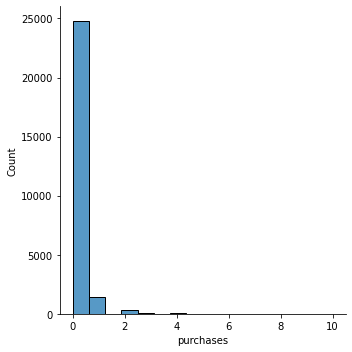

In [ ]:
# 타겟으로 쓸 '구매량'데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

print(df['purchases'].value_counts())
print('\n')
sns.displot(df['purchases']);

In [ ]:
# 타겟 이진분류 문제로 변환

## 구매량이 1 이상이면 buy = 1, 구매량이 0이면 buy = 0
df['buy'] = (df['purchases'] >= 1).astype(int)                              

print(df['buy'].value_counts(normalize=True))
df.head(5)

0    0.926179
1    0.073821
Name: buy, dtype: float64


,ad_set_name,ad_name,objective,age,gender,day,amount_spent,impressions,reach,frequency,link_clicks,attribution_setting,post_reactions,post_saves,post_shares,checkouts_initiated,purchases,value,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,start_report,end_report,buy
0,W70_retargeting_A_click_notpurchase_D+28,week70_carousel_highorder,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,1743.0,179,175,1.022857,15.0,7-day click or 1-day view,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,25.0,2020-02-29,2020-02-29,0
1,20SP_demo_2559_female_purchase,20SP_week69_carousel_top_shirt_stripetie_1080x...,CONVERSIONS,45-54,female,2020-02-29,187.0,7,7,1.000000,1.0,7-day click or 1-day view,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2020-02-29,2020-02-29,0
2,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,35-44,female,2020-02-29,86.0,28,28,1.000000,1.0,7-day click or 1-day view,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2020-02-29,2020-02-29,0
3,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,55-64,female,2020-02-29,59.0,2,2,1.000000,1.0,7-day click or 1-day view,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2020-02-29,2020-02-29,0
4,W70_demo_2559_female_click,week70_carousel_spring,PRODUCT_CATALOG_SALES,25-34,female,2020-02-29,0.0,6,6,1.000000,0.0,7-day click or 1-day view,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-02-29,2020-02-29,0


# 훈련-테스트 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=.80, test_size=.20, random_state=10)

In [ ]:
print(train.shape)
print(test.shape)
print(df.shape)

(21403, 26)
(5351, 26)
(26754, 26)


# Feature Engineering

In [ ]:
## feature engineering

def clean_and_engineering(df):

  ## 상품 분류

  # 상품 대분류
  df.loc[df['ad_name'].str.contains('_top'), 'category1'] = 'top'
  df.loc[df['ad_name'].str.contains('_bottom'), 'category1'] = 'bottom'
  df.loc[df['ad_name'].str.contains('_dress'), 'category1'] = 'dress'
  df.loc[df['ad_name'].str.contains('_outer'), 'category1'] = 'outer'
  df.loc[df['ad_name'].str.contains('_accessory'), 'category1'] = 'accessory'
  df.loc[df['ad_name'].str.contains('_shoesbag'), 'category1'] = 'shoesbag'

  # 상품 중분류
  df.loc[df['ad_name'].str.contains('_tee'), 'category2'] = 'tee'
  df.loc[df['ad_name'].str.contains('_shirt'), 'category2'] = 'shirt'
  df.loc[df['ad_name'].str.contains('_blouse'), 'category2'] = 'blouse'
  df.loc[df['ad_name'].str.contains('_vest'), 'category2'] = 'vest'
  df.loc[df['ad_name'].str.contains('_skirt'), 'category2'] = 'skirt'
  df.loc[df['ad_name'].str.contains('_pants'), 'category2'] = 'pants'
  df.loc[df['ad_name'].str.contains('_jumpsuit'), 'category2'] = 'jumpsuit'
  df.loc[df['ad_name'].str.contains('_onepiece'), 'category2'] = 'onepiece'
  df.loc[df['ad_name'].str.contains('_jacket'), 'category2'] = 'jacket'
  df.loc[df['ad_name'].str.contains('_coat'), 'category2'] = 'coat'
  df.loc[df['ad_name'].str.contains('_cardigan'), 'category2'] = 'cardigan'
  df.loc[df['ad_name'].str.contains('_jumper'), 'category2'] = 'jumper'
  df.loc[df['ad_name'].str.contains('_accessory'), 'category2'] = 'accessory'
  df.loc[df['ad_name'].str.contains('_shoes'), 'category2'] = 'shoes'
  df.loc[df['ad_name'].str.contains('_bag'), 'category2'] = 'bag'

  ## 새로운 특성 생성

  # Cost per mille
  df['cpm'] = round(((df['amount_spent']/df['impressions'])*1000), 2)

  # frequency
  df['frequency'] = round(df['frequency'], 2)

  # click rate
  df['ctr'] = round((df['link_clicks']/df['impressions']), 2)

  # cost per click
  df['cpc'] = round((df['amount_spent']/df['link_clicks']), 0)

  # purchase rate
  df['cvr'] = round((df['purchases']/df['link_clicks']), 2)

  # cost per purchase
  df['cpa'] = round((df['amount_spent']/df['purchases']), 0)

  # ROAS (Return of ad spending)
  df['ROAS'] = round((df['value']/df['amount_spent'])*100, 0)

  ## Year
  df['day'] = df['day'].astype(str)
  df.loc[df['day'].str.contains('2020-'), 'years'] = '2020'
  df.loc[df['day'].str.contains('2021-'), 'years'] = '2021'

  ## Season
  df.loc[df['day'].str.contains('2020-03|2020-04|2020-05|2020-06|2020-07|2020-08'), 'seasons'] = 'SS'
  df.loc[df['day'].str.contains('2021-03|2021-04|2021-05|2021-06|2021-07'), 'seasons'] = 'SS'
  df.loc[df['day'].str.contains('2020-02|2020-09|2020-10|2020-11|2020-12'), 'seasons'] = 'AW'
  df.loc[df['day'].str.contains('2021-01|2021-02'), 'seasons'] = 'AW'

  ## Month
  df.loc[df['day'].str.contains('2021-01'), 'months'] = '1'
  df.loc[df['day'].str.contains('2020-02|2021-02'), 'months'] = '2'
  df.loc[df['day'].str.contains('2020-03|2021-03'), 'months'] = '3'
  df.loc[df['day'].str.contains('2020-04|2021-04'), 'months'] = '4'
  df.loc[df['day'].str.contains('2020-05|2021-05'), 'months'] = '5'
  df.loc[df['day'].str.contains('2020-06|2021-06'), 'months'] = '6'
  df.loc[df['day'].str.contains('2020-07|2021-07'), 'months'] = '7'
  df.loc[df['day'].str.contains('2020-08'), 'months'] = '8'
  df.loc[df['day'].str.contains('2020-09'), 'months'] = '9'
  df.loc[df['day'].str.contains('2020-10'), 'months'] = '10'
  df.loc[df['day'].str.contains('2020-11'), 'months'] = '11'
  df.loc[df['day'].str.contains('2020-12'), 'months'] = '12'

  ## 특성 삭제
  dels = ['ad_set_name', 'ad_name', 'day',
          'attribution_setting', 'start_report', 'end_report']
  df = df.drop(columns=dels, axis=1)

  return df

In [ ]:
train = clean_and_engineering(train)
test = clean_and_engineering(test)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

In [ ]:
# 1. category에서 분류되지 못한 값들 값 지정
# 2. 새롭게 만들어진 특성들의 값중 결측치 처리

def handle_missing(df):

  ## missings in categories handling
  df['category1'].fillna('unclassified', inplace=True)
  df['category2'].fillna('unclassified', inplace=True)

  ## missings in new features handling
  cols = ['cpm', 'ctr', 'cpc', 'cvr', 'cpa', 'ROAS']
  
  for col in cols:
    df[col].fillna(0, inplace=True)

  return df

In [ ]:
train = handle_missing(train)
test = handle_missing(test)

In [ ]:
# inf값을 0으로 대체하기 위해 특성들을 따로 떼어낸다.
cpc = train['cpc'].to_numpy()
cpc = np.nan_to_num(cpc, posinf=0)

cvr = train['cvr'].to_numpy()
cvr = np.nan_to_num(cvr, posinf=0)

cpa = train['cpa'].to_numpy()
cpa = np.nan_to_num(cpa, posinf=0)

ROAS = train['ROAS'].to_numpy()
ROAS = np.nan_to_num(ROAS, posinf=0)

cpc_series = pd.Series(cpc)
cvr_series = pd.Series(cvr)
cpa_series = pd.Series(cpa)
ROAS_series = pd.Series(ROAS)

cpc_test = test['cpc'].to_numpy()
cpc_test = np.nan_to_num(cpc_test, posinf=0)

cvr_test = test['cvr'].to_numpy()
cvr_test = np.nan_to_num(cvr_test, posinf=0)

cpa_test = test['cpa'].to_numpy()
cpa_test = np.nan_to_num(cpa_test, posinf=0)

ROAS_test = test['ROAS'].to_numpy()
ROAS_test = np.nan_to_num(ROAS_test, posinf=0)

cpc_test_series = pd.Series(cpc_test)
cvr_test_series = pd.Series(cvr_test)
cpa_test_series = pd.Series(cpa_test)
ROAS_test_series = pd.Series(ROAS_test)

In [ ]:
# inf값을 0으로 대체한 특성들끼리 concat
finite = pd.concat([cpc_series, cvr_series, cpa_series, ROAS_series], axis=1)
finite_test = pd.concat([cpc_test_series, cvr_test_series, cpa_test_series, ROAS_test_series], axis=1)

# 특성이름 지정
finite.columns = ['cpc','cvr','cpa','ROAS']
finite_test.columns = ['cpc','cvr','cpa','ROAS']

In [ ]:
# train, test의 기존 ['cpc','cvr','cpa','ROAS'] drop 후 inf > 0 변경된 특성 데이터프레임 concat

train = train.drop(columns=['cpc','cvr','cpa','ROAS'], axis=1)\
             .reset_index(drop=True)
test = test.drop(columns=['cpc','cvr','cpa','ROAS'], axis=1)\
           .reset_index(drop=True)

In [ ]:
train = pd.concat([train, finite], axis=1)
test = pd.concat([test, finite_test], axis=1)

In [ ]:
train

,objective,age,gender,amount_spent,impressions,reach,frequency,link_clicks,post_reactions,post_saves,post_shares,checkouts_initiated,purchases,value,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,buy,category1,category2,cpm,ctr,years,seasons,months,cpc,cvr,cpa,ROAS
0,CONVERSIONS,25-34,female,523.0,40,40,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0,top,vest,13075.00,0.00,2021,SS,4,0.0,0.00,0.0,0.0
1,CONVERSIONS,25-34,female,680.0,68,68,1.00,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,0,dress,onepiece,10000.00,0.06,2020,SS,3,170.0,0.00,0.0,0.0
2,CONVERSIONS,55-64,female,819.0,51,48,1.06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,0,outer,jumper,16058.82,0.04,2020,SS,4,410.0,0.00,0.0,0.0
3,CONVERSIONS,55-64,female,327.0,4,4,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,bottom,pants,81750.00,0.00,2020,SS,8,0.0,0.00,0.0,0.0
4,CONVERSIONS,25-34,female,2998.0,392,385,1.02,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,14.0,18.0,0,top,tee,7647.96,0.03,2020,AW,10,231.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21398,CONVERSIONS,35-44,female,5287.0,554,538,1.03,25.0,1.0,4.0,0.0,1.0,2.0,172100.0,0.0,0.0,0.0,22.0,56.0,1,dress,onepiece,9543.32,0.05,2020,SS,5,211.0,0.08,2644.0,3255.0
21399,CONVERSIONS,25-34,female,286.0,54,53,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,dress,onepiece,5296.30,0.02,2020,SS,4,286.0,0.00,0.0,0.0
21400,CONVERSIONS,45-54,female,1052.0,42,41,1.02,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0,outer,cardigan,25047.62,0.07,2020,AW,11,351.0,0.00,0.0,0.0
21401,CONVERSIONS,35-44,female,2620.0,296,281,1.05,7.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,19.0,0,dress,onepiece,8851.35,0.02,2020,SS,4,374.0,0.00,0.0,0.0


# 훈련세트 타겟 분포 확인

In [ ]:
target = 'buy'
features = train.drop(columns=[target,'purchases']).columns

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21403, 29)
(5351, 29)
(21403,)
(5351,)


In [ ]:
# train-val split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, test_size=.2,
                                  stratify=y_train, random_state=42)

In [ ]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (17122, 29)
y_train shape (17122,)
X_val shape (4281, 29)
y_val shape (4281,)
X_test shape (5351, 29)
y_test shape (5351,)


In [ ]:
# 클래스 분포 확인
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

0    0.926177
1    0.073823
Name: buy, dtype: float64
0    0.926185
1    0.073815
Name: buy, dtype: float64


- 타겟클래스 0 : 구매 안 함
- 타겟클래스 1 : 구매 함
> 
> 92 : 8 로 극심한 불균형 클래스 상태

# Ordinal Encoding

In [ ]:
pip install --upgrade category_encoders

In [ ]:
from category_encoders import OrdinalEncoder

enc = OrdinalEncoder()

X_train_encoded = enc.fit_transform(X_train)
X_val_encoded = enc.transform(X_val)
X_test_encoded = enc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# 마지막 테스트 검증을 위해 인코딩 데이터 확보
X_test_over = X_test_encoded.copy()
X_test_nover = X_test_encoded.copy()

In [ ]:
X_test_over.shape

(5351, 29)

In [ ]:
enc.category_mapping

[{'col': 'objective',
  'data_type': dtype('O'),
  'mapping': CONVERSIONS              1
  PRODUCT_CATALOG_SALES    2
  LINK_CLICKS              3
  NaN                     -2
  dtype: int64},
 {'col': 'age', 'data_type': dtype('O'), 'mapping': 55-64      1
  25-34      2
  35-44      3
  45-54      4
  18-24      5
  Unknown    6
  65+        7
  13-17      8
  NaN       -2
  dtype: int64},
 {'col': 'gender', 'data_type': dtype('O'), 'mapping': female     1
  unknown    2
  male       3
  NaN       -2
  dtype: int64},
 {'col': 'category1', 'data_type': dtype('O'), 'mapping': dress           1
  unclassified    2
  outer           3
  top             4
  bottom          5
  shoesbag        6
  accessory       7
  NaN            -2
  dtype: int64},
 {'col': 'category2', 'data_type': dtype('O'), 'mapping': onepiece         1
  unclassified     2
  jacket           3
  tee              4
  skirt            5
  pants            6
  blouse           7
  jumper           8
  vest            

# Oversampling by SMOTE

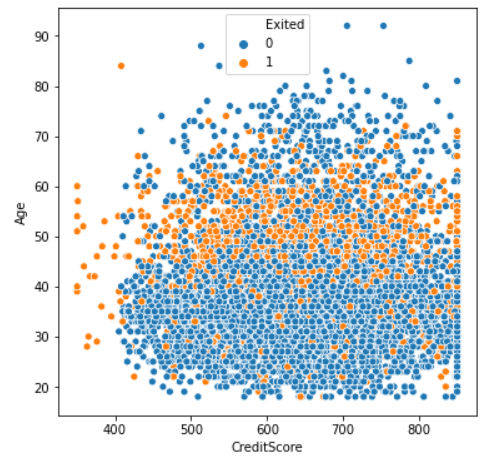

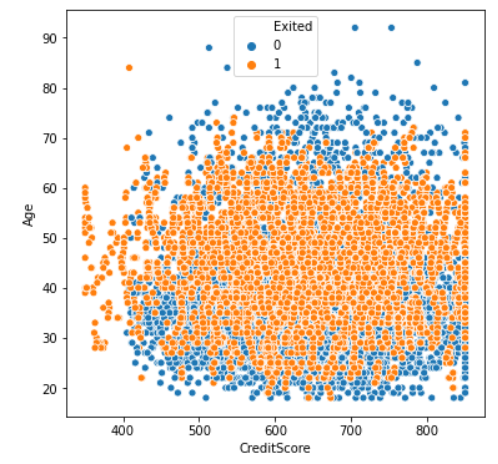

In [ ]:
# SMOTE 기법 활용
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 2)
X_train_over, y_train_over = smote.fit_sample(X_train_encoded, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# dataframe
print(X_train_encoded.shape)
print(y_train.shape)

# ndarray
print(X_train_over.shape)
print(y_train_over.shape)

(17122, 29)
(17122,)
(31716, 29)
(31716,)


In [ ]:
# 50:50으로 맞춰졌다.
pd.Series(y_train_over).value_counts(normalize=True)

1    0.5
0    0.5
dtype: float64

In [ ]:
# baseline model
print(pd.Series(y_train_over).value_counts(normalize=True)[0])

0.5


# Overfitting caused by leakage

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
processor = make_pipeline(
    StandardScaler()
)

X_train_processed = processor.fit_transform(X_train_over)
X_val_processed = processor.transform(X_val_encoded)

eval_set = [(X_train_processed, y_train_over),
            (X_val_processed, y_val)]

xgb_model = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model.fit(X_train_processed, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:1	validation_1-auc:1
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:1	validation_1-auc:1
[2]	validation_0-auc:1	validation_1-auc:1
[3]	validation_0-auc:1	validation_1-auc:1
[4]	validation_0-auc:1	validation_1-auc:1
[5]	validation_0-auc:1	validation_1-auc:1
[6]	validation_0-auc:1	validation_1-auc:1
[7]	validation_0-auc:1	validation_1-auc:1
[8]	validation_0-auc:1	validation_1-auc:1
[9]	validation_0-auc:1	validation_1-auc:1
[10]	validation_0-auc:1	validation_1-auc:1
[11]	validation_0-auc:1	validation_1-auc:1
[12]	validation_0-auc:1	validation_1-auc:1
[13]	validation_0-auc:1	validation_1-auc:1
[14]	validation_0-auc:1	validation_1-auc:1
[15]	validation_0-auc:1	validation_1-auc:1
[16]	validation_0-auc:1	validation_1-auc:1
[17]	validation_0-auc:1	validation_1-auc:1
[18]	validation_0-auc:1	validation_1-auc:1
[19]	validation_0-auc:1	validation_1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_1= xgb_model.predict(X_val_processed)

In [ ]:
def get_score(y_val, y_pred_val):
  confusion = confusion_matrix(y_val, y_pred_val)
  accuracy = accuracy_score(y_val, y_pred_val)
  precision = precision_score(y_val, y_pred_val)
  recall = recall_score(y_val, y_pred_val)
  F1 = f1_score(y_val, y_pred_val)
  AUC = roc_auc_score(y_val, y_pred_val)
  CR = classification_report(y_val, y_pred_val)
  print('오차행렬:\n', confusion)
  print('\n정확도: {:.4f}'.format(accuracy))
  print('정밀도: {:.4f}'.format(precision))
  print('재현율: {:.4f}'.format(recall))
  print('F1: {:.4f}'.format(F1))
  print('AUC: {:.4f}'.format(AUC))
  print(CR)

In [ ]:
# 정밀도 위주로 본다.
# : 학습모델이 광고 성과 데이터를 통해 구매를 할 사람을 집중적으로 정확하게 예측하는 것이 중요하기 때문.
get_score(y_val, y_pred_val_1)

오차행렬:
 [[3965    0]
 [   0  316]]

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1: 1.0000
AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3965
           1       1.00      1.00      1.00       316

    accuracy                           1.00      4281
   macro avg       1.00      1.00      1.00      4281
weighted avg       1.00      1.00      1.00      4281



# Permutation Importance

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# permuter 정의
permuter = PermutationImportance(
    xgb_model, # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_processed = processor.transform(X_val_encoded)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_processed, y_val);

In [ ]:
# value : purchases가 1이상이어야만 발생하는 값. 
# 즉, 타겟으로 선정한 buy에 직간접적으로 영향을 주기 때문에 정보의 누수가 발생한 것.
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

value                  0.495772
ROAS                   0.000000
unique_addstocart      0.000000
age                    0.000000
gender                 0.000000
amount_spent           0.000000
impressions            0.000000
reach                  0.000000
frequency              0.000000
link_clicks            0.000000
post_reactions         0.000000
post_saves             0.000000
post_shares            0.000000
checkouts_initiated    0.000000
addstocart             0.000000
cpa                    0.000000
cartvalue              0.000000
unique_contentviews    0.000000
contentviews           0.000000
category1              0.000000
category2              0.000000
cpm                    0.000000
ctr                    0.000000
years                  0.000000
seasons                0.000000
months                 0.000000
cpc                    0.000000
cvr                    0.000000
objective              0.000000
dtype: float64

# value 컬럼 드롭 후 모델 재학습

In [ ]:
# SMOTE oversampling 이후 array형식으로 변함
X_train_over = pd.DataFrame(X_train_over, columns=['objective', 'age', 'gender', 'amount_spent', 'impressions', 'reach',
       'frequency', 'link_clicks', 'post_reactions', 'post_saves',
       'post_shares', 'checkouts_initiated', 'value', 'unique_addstocart',
       'addstocart', 'cartvalue', 'unique_contentviews', 'contentviews',
       'category1', 'category2', 'cpm', 'ctr', 'years', 'seasons', 'months',
       'cpc', 'cvr', 'cpa', 'ROAS'])

In [ ]:
mask = ['value']

X_train_over.drop(columns=mask, axis=1, inplace=True)
X_val_encoded.drop(columns=mask, axis=1, inplace=True)
X_test.drop(columns=mask, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
processor = make_pipeline(
    StandardScaler()
)

X_train_processed = processor.fit_transform(X_train_over)
X_val_processed = processor.transform(X_val_encoded)

eval_set = [(X_train_processed, y_train_over),
            (X_val_processed, y_val)]

xgb_model = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model.fit(X_train_processed, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.999914	validation_1-auc:0.99983
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.999914	validation_1-auc:0.99983
[2]	validation_0-auc:0.999914	validation_1-auc:0.99983
[3]	validation_0-auc:0.999914	validation_1-auc:0.99983
[4]	validation_0-auc:0.999914	validation_1-auc:0.99983
[5]	validation_0-auc:0.999959	validation_1-auc:0.999842
[6]	validation_0-auc:0.999971	validation_1-auc:0.999952
[7]	validation_0-auc:0.999973	validation_1-auc:0.999901
[8]	validation_0-auc:0.999971	validation_1-auc:0.999952
[9]	validation_0-auc:0.999973	validation_1-auc:0.999901
[10]	validation_0-auc:0.999977	validation_1-auc:0.99993
[11]	validation_0-auc:0.999975	validation_1-auc:0.999947
[12]	validation_0-auc:0.999977	validation_1-auc:0.99993
[13]	validation_0-auc:0.999978	validation_1-auc:0.999933
[14]	validation_0-auc:0.999978	validation_1-auc:0.999933
[15]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_2 = xgb_model.predict(X_val_processed)
get_score(y_val, y_pred_val_2)

오차행렬:
 [[3964    1]
 [   2  314]]

정확도: 0.9993
정밀도: 0.9968
재현율: 0.9937
F1: 0.9952
AUC: 0.9967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3965
           1       1.00      0.99      1.00       316

    accuracy                           1.00      4281
   macro avg       1.00      1.00      1.00      4281
weighted avg       1.00      1.00      1.00      4281



In [ ]:
# 다시 한번 Permutation importance 확인

permuter = PermutationImportance(
    xgb_model, # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

X_val_processed = processor.transform(X_val_encoded)

permuter.fit(X_val_processed, y_val);

In [ ]:
# cpa : Cost per action(purchases)로 구매당 단가이다.
# 즉 이 컬럼도 purchases가 1이상일 때만 발생하는 값으로 target인 buy에 직간접적으로 영향을 주어 정보의 누수 발생.
feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

cpa                    0.512311
impressions            0.013912
checkouts_initiated    0.000260
contentviews           0.000107
ROAS                   0.000000
unique_addstocart      0.000000
age                    0.000000
gender                 0.000000
amount_spent           0.000000
reach                  0.000000
frequency              0.000000
link_clicks            0.000000
post_reactions         0.000000
post_saves             0.000000
post_shares            0.000000
addstocart             0.000000
cartvalue              0.000000
unique_contentviews    0.000000
category2              0.000000
cpm                    0.000000
ctr                    0.000000
years                  0.000000
seasons                0.000000
months                 0.000000
cpc                    0.000000
cvr                    0.000000
objective              0.000000
category1             -0.000006
dtype: float64

# cpa(구매당 단가) 컬럼 드롭 후 모델 재학습

In [ ]:
mask = ['cpa']

X_train_over.drop(columns=mask, axis=1, inplace=True)
X_val_encoded.drop(columns=mask, axis=1, inplace=True)
X_test.drop(columns=mask, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
processor = make_pipeline(
    StandardScaler()
)

X_train_processed = processor.fit_transform(X_train_over)
X_val_processed = processor.transform(X_val_encoded)

eval_set = [(X_train_processed, y_train_over),
            (X_val_processed, y_val)]

xgb_model = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model.fit(X_train_processed, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.999914	validation_1-auc:0.99983
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.999914	validation_1-auc:0.99983
[2]	validation_0-auc:0.999914	validation_1-auc:0.99983
[3]	validation_0-auc:0.999914	validation_1-auc:0.99983
[4]	validation_0-auc:0.999914	validation_1-auc:0.99983
[5]	validation_0-auc:0.999959	validation_1-auc:0.999842
[6]	validation_0-auc:0.999971	validation_1-auc:0.999952
[7]	validation_0-auc:0.999973	validation_1-auc:0.999901
[8]	validation_0-auc:0.999971	validation_1-auc:0.999952
[9]	validation_0-auc:0.999973	validation_1-auc:0.999901
[10]	validation_0-auc:0.999977	validation_1-auc:0.99993
[11]	validation_0-auc:0.999975	validation_1-auc:0.999947
[12]	validation_0-auc:0.999977	validation_1-auc:0.99993
[13]	validation_0-auc:0.999978	validation_1-auc:0.999933
[14]	validation_0-auc:0.999978	validation_1-auc:0.999933
[15]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_3= xgb_model.predict(X_val_processed)
get_score(y_val, y_pred_val_3)

오차행렬:
 [[3964    1]
 [   2  314]]

정확도: 0.9993
정밀도: 0.9968
재현율: 0.9937
F1: 0.9952
AUC: 0.9967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3965
           1       1.00      0.99      1.00       316

    accuracy                           1.00      4281
   macro avg       1.00      1.00      1.00      4281
weighted avg       1.00      1.00      1.00      4281



In [ ]:
# permuter 정의
permuter = PermutationImportance(
    xgb_model, # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_processed = processor.transform(X_val_encoded)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_processed, y_val);

In [ ]:
# ROAS : Return of Ad spending 역시 target에 직간접적으로 영향

feature_names = X_val_encoded.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

ROAS                   0.513999
impressions            0.013260
checkouts_initiated    0.000288
contentviews           0.000100
unique_addstocart      0.000000
age                    0.000000
gender                 0.000000
amount_spent           0.000000
reach                  0.000000
frequency              0.000000
link_clicks            0.000000
post_reactions         0.000000
post_saves             0.000000
post_shares            0.000000
addstocart             0.000000
cvr                    0.000000
cartvalue              0.000000
unique_contentviews    0.000000
category2              0.000000
cpm                    0.000000
ctr                    0.000000
years                  0.000000
seasons                0.000000
months                 0.000000
cpc                    0.000000
objective              0.000000
category1             -0.000001
dtype: float64

# ROAS(지출광고비 대비 구매값, Return of Ad spending) 컬럽 드롭 후 재학습

In [ ]:
mask = ['ROAS']

X_train_over.drop(columns=mask, axis=1, inplace=True)
X_val_encoded.drop(columns=mask, axis=1, inplace=True)
X_test.drop(columns=mask, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
processor = make_pipeline(
    StandardScaler()
)

X_train_processed = processor.fit_transform(X_train_over)
X_val_processed = processor.transform(X_val_encoded)

eval_set = [(X_train_processed, y_train_over),
            (X_val_processed, y_val)]

xgb_model = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model.fit(X_train_processed, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.999201	validation_1-auc:0.996389
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.999201	validation_1-auc:0.996389
[2]	validation_0-auc:0.999201	validation_1-auc:0.996389
[3]	validation_0-auc:0.999201	validation_1-auc:0.996389
[4]	validation_0-auc:0.999199	validation_1-auc:0.996375
[5]	validation_0-auc:0.9992	validation_1-auc:0.996384
[6]	validation_0-auc:0.99924	validation_1-auc:0.996511
[7]	validation_0-auc:0.99926	validation_1-auc:0.996468
[8]	validation_0-auc:0.99926	validation_1-auc:0.996468
[9]	validation_0-auc:0.999258	validation_1-auc:0.996521
[10]	validation_0-auc:0.99926	validation_1-auc:0.996472
[11]	validation_0-auc:0.999265	validation_1-auc:0.996499
[12]	validation_0-auc:0.999264	validation_1-auc:0.996467
[13]	validation_0-auc:0.999266	validation_1-auc:0.99649
[14]	validation_0-auc:0.999265	validation_1-auc:0.996503
[15]	

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_4= xgb_model.predict(X_val_processed)
get_score(y_val, y_pred_val_4)

오차행렬:
 [[3960    5]
 [   9  307]]

정확도: 0.9967
정밀도: 0.9840
재현율: 0.9715
F1: 0.9777
AUC: 0.9851
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3965
           1       0.98      0.97      0.98       316

    accuracy                           1.00      4281
   macro avg       0.99      0.99      0.99      4281
weighted avg       1.00      1.00      1.00      4281



In [ ]:
# permuter 정의
permuter = PermutationImportance(
    xgb_model, # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_processed = processor.transform(X_val_encoded)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_processed, y_val);

In [ ]:
# cvr : conversion rate (purchases rate) 역시 영향 -> 정보의 누수

feature_names = X_val_encoded.columns.tolist()
series = pd.Series(permuter.feature_importances_, feature_names)
series.apply(lambda x: '%.6f' % x).sort_values(ascending=False)

cvr                     0.243623
link_clicks             0.006019
checkouts_initiated     0.002407
contentviews            0.002236
unique_contentviews     0.000089
category1               0.000027
reach                   0.000024
frequency               0.000018
objective               0.000010
years                   0.000010
addstocart              0.000006
seasons                 0.000005
post_reactions          0.000000
post_saves              0.000000
gender                  0.000000
unique_addstocart       0.000000
post_shares             0.000000
ctr                     0.000000
cpc                     0.000000
impressions            -0.000029
cartvalue              -0.000006
months                 -0.000005
age                    -0.000003
cpm                    -0.000002
amount_spent           -0.000001
category2              -0.000001
dtype: object

# cvr(구매전환율, conversion rate) 컬럽 드롭 후 재학습

In [ ]:
mask = ['cvr']

X_train_over.drop(columns=mask, axis=1, inplace=True)
X_val_encoded.drop(columns=mask, axis=1, inplace=True)
X_test.drop(columns=mask, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
processor = make_pipeline(
    StandardScaler()
)

X_train_processed = processor.fit_transform(X_train_over)
X_val_processed = processor.transform(X_val_encoded)

eval_set = [(X_train_processed, y_train_over),
            (X_val_processed, y_val)]

xgb_model = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model.fit(X_train_processed, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.959123	validation_1-auc:0.927775
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.931124
[2]	validation_0-auc:0.967356	validation_1-auc:0.938626
[3]	validation_0-auc:0.969112	validation_1-auc:0.939931
[4]	validation_0-auc:0.969539	validation_1-auc:0.940032
[5]	validation_0-auc:0.970453	validation_1-auc:0.940905
[6]	validation_0-auc:0.971594	validation_1-auc:0.939975
[7]	validation_0-auc:0.971936	validation_1-auc:0.94296
[8]	validation_0-auc:0.972803	validation_1-auc:0.943207
[9]	validation_0-auc:0.973846	validation_1-auc:0.943203
[10]	validation_0-auc:0.974447	validation_1-auc:0.943867
[11]	validation_0-auc:0.9767	validation_1-auc:0.943984
[12]	validation_0-auc:0.979318	validation_1-auc:0.944241
[13]	validation_0-auc:0.980826	validation_1-auc:0.943808
[14]	validation_0-auc:0.981931	validation_1-auc:0.944479
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_5= xgb_model.predict(X_val_processed)
get_score(y_val, y_pred_val_5)

오차행렬:
 [[3740  225]
 [  89  227]]

정확도: 0.9267
정밀도: 0.5022
재현율: 0.7184
F1: 0.5911
AUC: 0.8308
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3965
           1       0.50      0.72      0.59       316

    accuracy                           0.93      4281
   macro avg       0.74      0.83      0.78      4281
weighted avg       0.94      0.93      0.93      4281



In [ ]:
# permuter 정의
permuter = PermutationImportance(
    xgb_model, # model
    scoring='roc_auc', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_processed = processor.transform(X_val_encoded)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_processed, y_val);

In [ ]:
feature_names = X_val_encoded.columns.tolist()
series = pd.Series(permuter.feature_importances_, feature_names)\
            .apply(lambda x: '%.6f' % x)\
            .sort_values(ascending=False)
series

contentviews            0.105173
checkouts_initiated     0.053427
objective               0.005510
ctr                     0.002441
frequency               0.001961
post_saves              0.001188
post_reactions          0.000886
addstocart              0.000750
months                  0.000715
age                     0.000353
category1               0.000343
unique_contentviews     0.000330
unique_addstocart       0.000104
cartvalue               0.000018
post_shares             0.000000
category2               0.000000
cpm                     0.000000
years                   0.000000
reach                   0.000000
gender                  0.000000
cpc                     0.000000
seasons                -0.000211
impressions            -0.000032
link_clicks            -0.000022
amount_spent           -0.000000
dtype: object

In [ ]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.1052 ± 0.0115,contentviews
0.0534 ± 0.0039,checkouts_initiated
0.0055 ± 0.0024,objective
0.0024 ± 0.0026,ctr
0.0020 ± 0.0015,frequency
0.0012 ± 0.0005,post_saves
0.0009 ± 0.0010,post_reactions
0.0008 ± 0.0002,addstocart
0.0007 ± 0.0001,months
0.0004 ± 0.0006,age


# Feature Selection

In [ ]:
print('특성 삭제 전:', X_train_over.shape, X_val_encoded.shape)

특성 삭제 전: (31716, 25) (4281, 25)


In [ ]:
series.index

Index(['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months', 'age',
       'category1', 'unique_contentviews', 'unique_addstocart', 'cartvalue',
       'post_shares', 'category2', 'cpm', 'years', 'reach', 'gender', 'cpc',
       'seasons', 'impressions', 'link_clicks', 'amount_spent'],
      dtype='object')

In [ ]:
# 1. 모든 특성 사용
features = ['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months', 'age',
       'category1', 'unique_contentviews', 'unique_addstocart', 'cartvalue',
       'post_shares', 'category2', 'cpm', 'years', 'reach', 'gender', 'cpc',
       'seasons', 'impressions', 'link_clicks', 'amount_spent']

X_train_selected_1 = X_train_over[features]
X_val_selected_1 = X_val_encoded[features]
X_test_over = X_test_encoded[features]
X_test_nover = X_test_encoded[features]

print('특성 삭제 후:', X_train_selected_1.shape, X_val_selected_1.shape, X_test_over.shape, X_test_nover.shape)

특성 삭제 후: (31716, 25) (4281, 25) (5351, 25) (5351, 25)


In [ ]:
# 2. 순열중요도 음수인 특성 제거
features = ['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months', 'age',
       'category1', 'unique_contentviews', 'unique_addstocart', 'cartvalue',
       'post_shares', 'category2', 'cpm', 'years', 'reach', 'gender', 'cpc']

X_train_selected_2 = X_train_over[features]
X_val_selected_2 = X_val_encoded[features]

print('특성 삭제 후:', X_train_selected_2.shape, X_val_selected_2.shape)

특성 삭제 후: (31716, 21) (4281, 21)


In [ ]:
# 3. 순열중요도 0 이하 특성 제거
features = ['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months', 'age',
       'category1', 'unique_contentviews', 'unique_addstocart', 'cartvalue']

X_train_selected_3 = X_train_over[features]
X_val_selected_3 = X_val_encoded[features]

print('특성 삭제 후:', X_train_selected_3.shape, X_val_selected_3.shape)

특성 삭제 후: (31716, 14) (4281, 14)


In [ ]:
# 4. 순열중요도 0.005 이하 특성 제거
features = ['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months']

X_train_selected_4 = X_train_over[features]
X_val_selected_4 = X_val_encoded[features]

print('특성 삭제 후:', X_train_selected_4.shape, X_val_selected_4.shape)

특성 삭제 후: (31716, 9) (4281, 9)


# 특성수에 따른 XGBoost 학습 점수 비교

In [ ]:
# 1. 모든 특성 사용

processor = make_pipeline(
    StandardScaler()
)

X_train_processed_1 = processor.fit_transform(X_train_selected_1)
X_val_processed_1 = processor.transform(X_val_selected_1)

eval_set = [(X_train_processed_1, y_train_over),
            (X_val_processed_1, y_val)]

xgb_model_1 = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_1.fit(X_train_processed_1, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.959123	validation_1-auc:0.927775
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.931124
[2]	validation_0-auc:0.967356	validation_1-auc:0.938626
[3]	validation_0-auc:0.969112	validation_1-auc:0.939931
[4]	validation_0-auc:0.969539	validation_1-auc:0.940032
[5]	validation_0-auc:0.970453	validation_1-auc:0.940905
[6]	validation_0-auc:0.971594	validation_1-auc:0.939975
[7]	validation_0-auc:0.971936	validation_1-auc:0.94296
[8]	validation_0-auc:0.972803	validation_1-auc:0.943207
[9]	validation_0-auc:0.973846	validation_1-auc:0.943203
[10]	validation_0-auc:0.974447	validation_1-auc:0.943867
[11]	validation_0-auc:0.9767	validation_1-auc:0.943984
[12]	validation_0-auc:0.979318	validation_1-auc:0.944241
[13]	validation_0-auc:0.980826	validation_1-auc:0.943808
[14]	validation_0-auc:0.981931	validation_1-auc:0.944479
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# 2. 순열중요도 음수인 특성 제거

processor = make_pipeline(
    StandardScaler()
)

X_train_processed_2 = processor.fit_transform(X_train_selected_2)
X_val_processed_2 = processor.transform(X_val_selected_2)

eval_set = [(X_train_processed_2, y_train_over),
            (X_val_processed_2, y_val)]

xgb_model_2 = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_2.fit(X_train_processed_2, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.959123	validation_1-auc:0.927775
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.931124
[2]	validation_0-auc:0.967356	validation_1-auc:0.938626
[3]	validation_0-auc:0.969112	validation_1-auc:0.939931
[4]	validation_0-auc:0.969539	validation_1-auc:0.940032
[5]	validation_0-auc:0.970264	validation_1-auc:0.940926
[6]	validation_0-auc:0.97049	validation_1-auc:0.940749
[7]	validation_0-auc:0.971348	validation_1-auc:0.940927
[8]	validation_0-auc:0.972697	validation_1-auc:0.944809
[9]	validation_0-auc:0.973299	validation_1-auc:0.945056
[10]	validation_0-auc:0.974232	validation_1-auc:0.944709
[11]	validation_0-auc:0.977545	validation_1-auc:0.944924
[12]	validation_0-auc:0.978504	validation_1-auc:0.945489
[13]	validation_0-auc:0.980098	validation_1-auc:0.945438
[14]	validation_0-auc:0.981368	validation_1-auc:0.945593

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# 3. 순열중요도 0 이하 특성 제거

processor = make_pipeline(
    StandardScaler()
)

X_train_processed_3 = processor.fit_transform(X_train_selected_3)
X_val_processed_3 = processor.transform(X_val_selected_3)

eval_set = [(X_train_processed_3, y_train_over),
            (X_val_processed_3, y_val)]

xgb_model_3 = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_3.fit(X_train_processed_3, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.959123	validation_1-auc:0.927775
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.931124
[2]	validation_0-auc:0.967356	validation_1-auc:0.938626
[3]	validation_0-auc:0.969112	validation_1-auc:0.939931
[4]	validation_0-auc:0.969539	validation_1-auc:0.940032
[5]	validation_0-auc:0.970264	validation_1-auc:0.940926
[6]	validation_0-auc:0.97049	validation_1-auc:0.940749
[7]	validation_0-auc:0.971348	validation_1-auc:0.940927
[8]	validation_0-auc:0.972697	validation_1-auc:0.944809
[9]	validation_0-auc:0.973299	validation_1-auc:0.945056
[10]	validation_0-auc:0.974232	validation_1-auc:0.944709
[11]	validation_0-auc:0.977545	validation_1-auc:0.944924
[12]	validation_0-auc:0.978564	validation_1-auc:0.945593
[13]	validation_0-auc:0.980124	validation_1-auc:0.945518
[14]	validation_0-auc:0.980895	validation_1-auc:0.945264

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# 4. 순열중요도 0.005 이하 특성 제거

processor = make_pipeline(
    StandardScaler()
)

X_train_processed_4 = processor.fit_transform(X_train_selected_4)
X_val_processed_4 = processor.transform(X_val_selected_4)

eval_set = [(X_train_processed_4, y_train_over),
            (X_val_processed_4, y_val)]

xgb_model_4 = XGBClassifier(n_estimators=100,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_4.fit(X_train_processed_4, y_train_over,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=20)

[0]	validation_0-auc:0.959123	validation_1-auc:0.927775
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.931124
[2]	validation_0-auc:0.967356	validation_1-auc:0.938626
[3]	validation_0-auc:0.969112	validation_1-auc:0.939931
[4]	validation_0-auc:0.969457	validation_1-auc:0.94036
[5]	validation_0-auc:0.97015	validation_1-auc:0.941262
[6]	validation_0-auc:0.97035	validation_1-auc:0.941225
[7]	validation_0-auc:0.971052	validation_1-auc:0.943519
[8]	validation_0-auc:0.971779	validation_1-auc:0.943592
[9]	validation_0-auc:0.972475	validation_1-auc:0.94429
[10]	validation_0-auc:0.973102	validation_1-auc:0.944069
[11]	validation_0-auc:0.973716	validation_1-auc:0.943518
[12]	validation_0-auc:0.976807	validation_1-auc:0.943742
[13]	validation_0-auc:0.978647	validation_1-auc:0.943727
[14]	validation_0-auc:0.98035	validation_1-auc:0.944058
[15

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# 비교
y_pred_val_fts_1 = xgb_model_1.predict(X_val_processed_1)
y_pred_val_fts_2 = xgb_model_2.predict(X_val_processed_2)
y_pred_val_fts_3 = xgb_model_3.predict(X_val_processed_3)
y_pred_val_fts_4 = xgb_model_4.predict(X_val_processed_4)

print('<<<<<모든 특성 사용>>>>>:')
print(get_score(y_val, y_pred_val_fts_1))
print('\n')
print('<<<<<중요도 음수 제거>>>>>:')
print(get_score(y_val, y_pred_val_fts_2))
print('\n')
print('<<<<<중요도 0이하 제거>>>>>:')
print(get_score(y_val, y_pred_val_fts_3))
print('\n')
print('<<<<<중요도 0.005이하 제거>>>>>:')
print(get_score(y_val, y_pred_val_fts_4))

<<<<<모든 특성 사용>>>>>:
오차행렬:
 [[3740  225]
 [  89  227]]

정확도: 0.9267
정밀도: 0.5022
재현율: 0.7184
F1: 0.5911
AUC: 0.8308
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3965
           1       0.50      0.72      0.59       316

    accuracy                           0.93      4281
   macro avg       0.74      0.83      0.78      4281
weighted avg       0.94      0.93      0.93      4281

None


<<<<<중요도 음수 제거>>>>>:
오차행렬:
 [[3661  304]
 [  61  255]]

정확도: 0.9147
정밀도: 0.4562
재현율: 0.8070
F1: 0.5829
AUC: 0.8651
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3965
           1       0.46      0.81      0.58       316

    accuracy                           0.91      4281
   macro avg       0.72      0.87      0.77      4281
weighted avg       0.94      0.91      0.93      4281

None


<<<<<중요도 0이하 제거>>>>>:
오차행렬:
 [[3619  346]
 [  60  256]]

정확도: 0.9052
정밀도: 0.4252
재현율: 0.8101
F1: 0.5577

# 최종 모델 (xgb_model_1 : 모든 특성 활용)
> 정밀도가 가장 높음

In [ ]:
print('<<<<<모든 특성 사용>>>>>:')
print(get_score(y_val, y_pred_val_fts_1))

<<<<<모든 특성 사용>>>>>:
오차행렬:
 [[3740  225]
 [  89  227]]

정확도: 0.9267
정밀도: 0.5022
재현율: 0.7184
F1: 0.5911
AUC: 0.8308
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3965
           1       0.50      0.72      0.59       316

    accuracy                           0.93      4281
   macro avg       0.74      0.83      0.78      4281
weighted avg       0.94      0.93      0.93      4281

None


# 최종모델로 테스트셋 테스트(Oversampling)

In [ ]:
# 테스트셋 컬럼 순서변경
X_test_over = X_test_over[['contentviews', 'checkouts_initiated', 'objective', 'ctr', 'frequency',
       'post_saves', 'post_reactions', 'addstocart', 'months', 'age',
       'category1', 'unique_contentviews', 'unique_addstocart', 'cartvalue',
       'post_shares', 'category2', 'cpm', 'years', 'reach', 'gender', 'cpc',
       'seasons', 'impressions', 'link_clicks', 'amount_spent']]

In [ ]:
# 모든 특성 활용 : 정밀도가 가장 높음
processor = make_pipeline(
    StandardScaler()
)

X_train_processed_over = processor.fit_transform(X_train_selected_1)
X_test_processed_over = processor.transform(X_test_over)

eval_set = [(X_train_processed_over, y_train_over),
            (X_test_processed_over, y_test)]

xgb_model_over = XGBClassifier(n_estimators=1500,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_over.fit(X_train_processed_over, y_train_over,
          eval_set=eval_set,
          eval_metric='auc',
          early_stopping_rounds=100)

[0]	validation_0-auc:0.959123	validation_1-auc:0.929419
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.963811	validation_1-auc:0.932042
[2]	validation_0-auc:0.967356	validation_1-auc:0.939592
[3]	validation_0-auc:0.969112	validation_1-auc:0.940087
[4]	validation_0-auc:0.969539	validation_1-auc:0.941094
[5]	validation_0-auc:0.970453	validation_1-auc:0.941329
[6]	validation_0-auc:0.971594	validation_1-auc:0.941545
[7]	validation_0-auc:0.971936	validation_1-auc:0.944253
[8]	validation_0-auc:0.972803	validation_1-auc:0.944223
[9]	validation_0-auc:0.973846	validation_1-auc:0.944066
[10]	validation_0-auc:0.974447	validation_1-auc:0.943966
[11]	validation_0-auc:0.9767	validation_1-auc:0.944383
[12]	validation_0-auc:0.979318	validation_1-auc:0.94406
[13]	validation_0-auc:0.980826	validation_1-auc:0.94409
[14]	validation_0-auc:0.981931	validation_1-auc:0.944044
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# oversampling y_pred
y_pred_over = xgb_model_over.predict(X_test_processed_over)
print(get_score(y_test, y_pred_over))

오차행렬:
 [[4830  126]
 [ 167  228]]

정확도: 0.9452
정밀도: 0.6441
재현율: 0.5772
F1: 0.6088
AUC: 0.7759
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4956
           1       0.64      0.58      0.61       395

    accuracy                           0.95      5351
   macro avg       0.81      0.78      0.79      5351
weighted avg       0.94      0.95      0.94      5351

None


# Without the oversampling

In [ ]:
X_test_nover = X_test_nover[['objective', 'age', 'gender', 'amount_spent', 'impressions', 'reach',
       'frequency', 'link_clicks', 'post_reactions', 'post_saves',
       'post_shares', 'checkouts_initiated', 'unique_addstocart', 'addstocart',
       'cartvalue', 'unique_contentviews', 'contentviews', 'category1',
       'category2', 'cpm', 'ctr', 'years', 'seasons', 'months', 'cpc']]
X_test_nover

,objective,age,gender,amount_spent,impressions,reach,frequency,link_clicks,post_reactions,post_saves,post_shares,checkouts_initiated,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,category1,category2,cpm,ctr,years,seasons,months,cpc
0,1,1,1,61.0,6,6,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,10166.67,0.00,2,1,2,0.0
1,1,2,1,1176.0,97,96,1.01,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,3,8,12123.71,0.03,1,2,9,392.0
2,2,2,1,15.0,2,2,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,7500.00,0.00,1,2,11,0.0
3,1,2,1,318.0,189,189,1.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,1682.54,0.02,2,1,1,106.0
4,1,2,1,156.0,15,15,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,7,10400.00,0.00,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,1,1,1,10.0,2,2,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5,6,5000.00,0.00,1,1,12,0.0
5347,1,3,1,674.0,55,54,1.02,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4,14,12254.55,0.02,1,2,5,674.0
5348,1,3,1,8474.0,913,906,1.01,30.0,3.0,1.0,0.0,0.0,1.0,1.0,138000.0,28.0,61.0,3,10,9281.49,0.03,1,2,8,282.0
5349,1,2,1,88.0,16,16,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,13,5500.00,0.00,1,1,3,0.0


In [ ]:
X_val_encoded

,objective,age,gender,amount_spent,impressions,reach,frequency,link_clicks,post_reactions,post_saves,post_shares,checkouts_initiated,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,category1,category2,cpm,ctr,years,seasons,months,cpc
6195,2,4,1,4199.0,304,293,1.04,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,23.0,2,2,13812.50,0.06,1,1,4,221.0
15061,1,2,1,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,4,4,0.00,0.00,1,2,9,0.0
17899,2,4,1,717.0,122,122,1.00,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,15.0,2,2,5877.05,0.09,1,2,11,65.0
9013,1,2,1,336.0,27,27,1.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,5,12444.44,0.00,1,2,5,0.0
9079,1,4,1,0.0,0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4,7,0.00,0.00,1,1,12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1861,1,3,1,607.0,54,54,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4,4,11240.74,0.02,1,1,7,607.0
12553,2,1,1,363.0,63,60,1.05,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2,2,5761.90,0.08,1,1,4,73.0
8283,1,3,1,3726.0,486,480,1.01,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,12.0,5,6,7666.67,0.02,1,1,2,373.0
6247,1,3,1,23402.0,2904,2830,1.03,129.0,12.0,14.0,1.0,7.0,3.0,8.0,1704300.0,146.0,236.0,3,10,8058.54,0.04,1,2,8,181.0


In [ ]:
X_train_encoded = X_train_encoded.drop(columns=['value','cvr','cpa','ROAS'])
X_train_encoded

,objective,age,gender,amount_spent,impressions,reach,frequency,link_clicks,post_reactions,post_saves,post_shares,checkouts_initiated,unique_addstocart,addstocart,cartvalue,unique_contentviews,contentviews,category1,category2,cpm,ctr,years,seasons,months,cpc
21373,1,1,1,422.0,20,19,1.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,21100.00,0.00,1,1,1,0.0
20722,1,1,1,513.0,23,20,1.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,1,22304.35,0.04,1,1,2,513.0
7976,1,2,1,2354.0,330,327,1.01,9.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,12.0,1,1,7133.33,0.03,1,1,3,262.0
19267,2,3,1,1799.0,404,402,1.00,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,35.0,2,2,4452.97,0.05,1,1,4,90.0
5081,1,1,1,1223.0,64,63,1.02,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,3,3,19109.38,0.05,1,2,5,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15895,1,3,1,2871.0,280,279,1.00,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,5,6,10253.57,0.01,1,2,8,957.0
830,1,3,1,5.0,1,1,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,4,5000.00,0.00,1,2,8,0.0
13785,1,4,1,2275.0,86,81,1.06,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1,1,26453.49,0.06,1,1,3,455.0
16226,2,2,3,8.0,2,2,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,4000.00,0.00,1,1,4,0.0


In [ ]:
# baseline model
y_train.value_counts(normalize=True)

0    0.926177
1    0.073823
Name: buy, dtype: float64

In [ ]:
# validation (non oversampling)
processor = make_pipeline(
    StandardScaler()
)

X_train_processed_nover = processor.fit_transform(X_train_encoded)
X_val_processed_nover = processor.transform(X_val_encoded)

eval_set = [(X_train_processed_nover, y_train),
            (X_val_processed_nover, y_val)]

xgb_model_val = XGBClassifier(n_estimators=1500,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_val.fit(X_train_processed_nover, y_train,
          eval_set=eval_set,
          eval_metric='auc', 
        #auc 스코어 사용 이유 : 클래스의 분포가 다를 때, 정밀도와 재현율을 함께 보며 Accuracy의 단점을 보완하면서 더 정확하게 하기 위함
          early_stopping_rounds=100)

[0]	validation_0-auc:0.899044	validation_1-auc:0.902502
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.925625	validation_1-auc:0.928365
[2]	validation_0-auc:0.940045	validation_1-auc:0.94207
[3]	validation_0-auc:0.940348	validation_1-auc:0.942735
[4]	validation_0-auc:0.941824	validation_1-auc:0.943066
[5]	validation_0-auc:0.942371	validation_1-auc:0.943719
[6]	validation_0-auc:0.946433	validation_1-auc:0.947713
[7]	validation_0-auc:0.946586	validation_1-auc:0.947765
[8]	validation_0-auc:0.946688	validation_1-auc:0.947812
[9]	validation_0-auc:0.947377	validation_1-auc:0.948033
[10]	validation_0-auc:0.947902	validation_1-auc:0.948367
[11]	validation_0-auc:0.950196	validation_1-auc:0.949923
[12]	validation_0-auc:0.950277	validation_1-auc:0.949915
[13]	validation_0-auc:0.951128	validation_1-auc:0.950356
[14]	validation_0-auc:0.951557	validation_1-auc:0.95057

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_val_nover = xgb_model_val.predict(X_val_processed_nover)
print('<<<<<Non-oversampling>>>>>')
print(get_score(y_val, y_pred_val_nover))
print('\n')
print('<<<<<Oversampling>>>>>')
print(get_score(y_val, y_pred_val_fts_1))

<<<<<Non-oversampling>>>>>
오차행렬:
 [[3892   73]
 [ 147  169]]

정확도: 0.9486
정밀도: 0.6983
재현율: 0.5348
F1: 0.6057
AUC: 0.7582
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3965
           1       0.70      0.53      0.61       316

    accuracy                           0.95      4281
   macro avg       0.83      0.76      0.79      4281
weighted avg       0.94      0.95      0.95      4281

None


<<<<<Oversampling>>>>>
오차행렬:
 [[3740  225]
 [  89  227]]

정확도: 0.9267
정밀도: 0.5022
재현율: 0.7184
F1: 0.5911
AUC: 0.8308
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      3965
           1       0.50      0.72      0.59       316

    accuracy                           0.93      4281
   macro avg       0.74      0.83      0.78      4281
weighted avg       0.94      0.93      0.93      4281

None


# 최종모델로 테스트셋 테스트(Non-oversampling)

In [ ]:
# test (non oversampling)
processor = make_pipeline(
    StandardScaler()
)

X_train_processed_nover = processor.fit_transform(X_train_encoded)
X_test_processed_nover = processor.transform(X_test_nover)

eval_set = [(X_train_processed_nover, y_train),
            (X_test_processed_nover, y_test)]

xgb_model_nover = XGBClassifier(n_estimators=1500,
                    learning_rate=.2,
                    max_depth=3,
                    n_jobs=-1,
                    random_state=42
                    )

xgb_model_nover.fit(X_train_processed_nover, y_train,
          eval_set=eval_set,
          eval_metric='auc', 
          early_stopping_rounds=100)

[0]	validation_0-auc:0.899044	validation_1-auc:0.908709
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.925625	validation_1-auc:0.930177
[2]	validation_0-auc:0.940045	validation_1-auc:0.939868
[3]	validation_0-auc:0.940348	validation_1-auc:0.939626
[4]	validation_0-auc:0.941824	validation_1-auc:0.942023
[5]	validation_0-auc:0.942371	validation_1-auc:0.942852
[6]	validation_0-auc:0.946433	validation_1-auc:0.946315
[7]	validation_0-auc:0.946586	validation_1-auc:0.946418
[8]	validation_0-auc:0.946688	validation_1-auc:0.947224
[9]	validation_0-auc:0.947377	validation_1-auc:0.947914
[10]	validation_0-auc:0.947902	validation_1-auc:0.948099
[11]	validation_0-auc:0.950196	validation_1-auc:0.950082
[12]	validation_0-auc:0.950277	validation_1-auc:0.950015
[13]	validation_0-auc:0.951128	validation_1-auc:0.950607
[14]	validation_0-auc:0.951557	validation_1-auc:0.9510

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1500, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_nover = xgb_model_nover.predict(X_test_processed_nover)
print('<<<<<Non-oversampling>>>>>')
print(get_score(y_test, y_pred_nover))
print('\n')
print('<<<<<Oversampling>>>>>')
print(get_score(y_test, y_pred_over))

<<<<<Non-oversampling>>>>>
오차행렬:
 [[4868   88]
 [ 187  208]]

정확도: 0.9486
정밀도: 0.7027
재현율: 0.5266
F1: 0.6020
AUC: 0.7544
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      4956
           1       0.70      0.53      0.60       395

    accuracy                           0.95      5351
   macro avg       0.83      0.75      0.79      5351
weighted avg       0.94      0.95      0.95      5351

None


<<<<<Oversampling>>>>>
오차행렬:
 [[4830  126]
 [ 167  228]]

정확도: 0.9452
정밀도: 0.6441
재현율: 0.5772
F1: 0.6088
AUC: 0.7759
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      4956
           1       0.64      0.58      0.61       395

    accuracy                           0.95      5351
   macro avg       0.81      0.78      0.79      5351
weighted avg       0.94      0.95      0.94      5351

None


# 결론

Oversampling이 불균형 클래스를 보완하는데 도움을 주는 것은 사실이다.

하지만 위의 학습 결과로 보아, Oversampling은 원하는 학습 방향으로 항상 높은 수준의 결과를 가져온다고 보기는 어렵다.